# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset
path = '/kaggle/input/d/jamalchepkurui/pets-form/form.csv'
form_df = pd.read_csv(path)
print(form_df)

  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


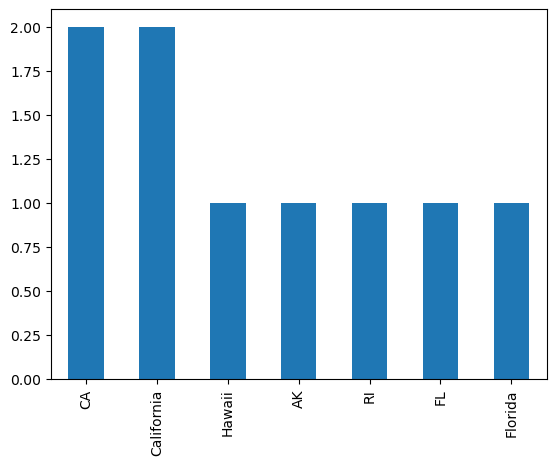

In [2]:
form_df['state'].value_counts().plot(kind='bar');
plt.show()

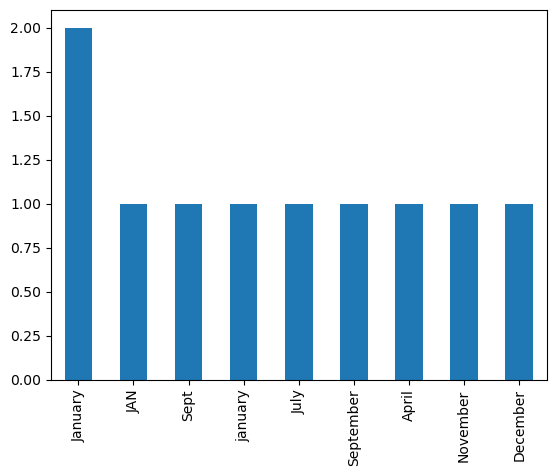

In [3]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

In [4]:
print(form_df.shape)
form_df.info()

(10, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   birth_month  10 non-null     object
 1   state        9 non-null      object
 2   pet          10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


From exploring the data above, I have determined that **formatting** is the biggest issue affecting visualization, along with a need to clean a Null value

In [5]:
# Formatting

# dtypes
form_df = form_df.convert_dtypes(infer_objects=True)
form_df.dtypes

birth_month    string
state          string
pet            string
dtype: object

In [6]:
# state and month formats

print(form_df.birth_month.unique())
print(form_df.state.unique())
months = {'JAN': 'January', 'Sept': 'September'}
states = {'AK': 'Arkansas', 'CA': 'California', 'FL':'Florida', 'RI':'Renessi'}

form_df.birth_month = form_df.birth_month.replace(months).str.capitalize()
form_df.state = form_df.state.replace(states).str.capitalize()
form_df

<StringArray>
[  'January',       'JAN',      'Sept',   'january',      'July', 'September',
     'April',  'November',  'December']
Length: 9, dtype: string
<StringArray>
[<NA>, 'CA', 'Hawaii', 'AK', 'RI', 'California', 'FL', 'Florida']
Length: 8, dtype: string


,birth_month,state,pet
0,January,<NA>,Cats
1,January,California,Cats
2,September,Hawaii,Dog
3,January,Arkansas,Dog
4,July,Renessi,Cats
5,September,California,Cats
6,April,California,Dog
7,January,California,Cats
8,November,Florida,Dog
9,December,Florida,Cats


In [7]:
# Drop Null Values
form_df.dropna(inplace=True)

Below is an accurate representation of responses from the store form

<Axes: >

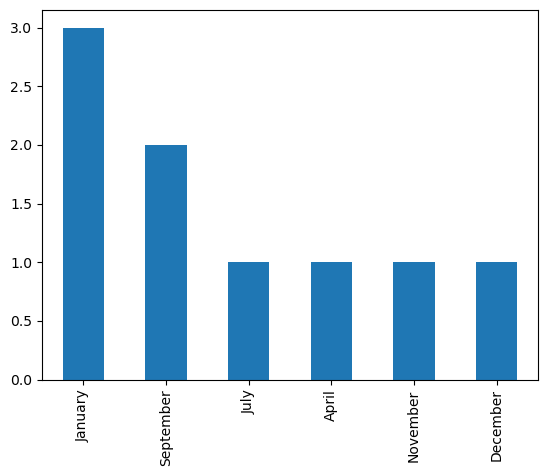

In [8]:
form_df.birth_month.value_counts().plot(kind='bar')

<Axes: >

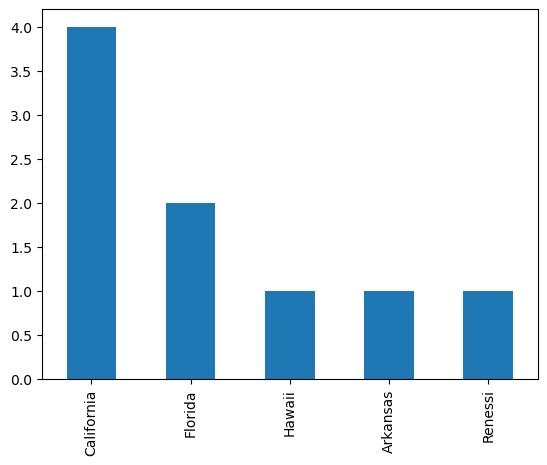

In [9]:
form_df.state.value_counts().plot(kind='bar')